# Sentiment Analysis of Tweets on the Aurat March 2018

#### hunaidhameed@hotmail.com

Data Source:
+ Tweets with hashtag #AuratMarch

<h3>ETL</h3>

In [31]:
import json_lines

In [32]:
d = {"author":[], "text":[], "url":[], "retweetCount":[], "favCount":[], "replyCount":[], "date":[], "time":[], "isReply":[], "isRetweet":[]}

with open('/home/hunaid/megaDoc', 'rb') as f:
    for item in json_lines.reader(f):
        d["author"].append(item["usernameTweet"])
        d["text"].append(item["text"].lower())
        d["url"].append(item["url"])
        d["retweetCount"].append(item["nbr_retweet"])
        d["favCount"].append(item["nbr_favorite"])
        d["replyCount"].append(item["nbr_reply"])
        d["date"].append(item["datetime"][:10])
        d["time"].append(item["datetime"][10:])
        d["isReply"].append(item["is_reply"])
        d["isRetweet"].append(item["is_retweet"])
        #d["media"].append(item["medias"])
        #print(item)

In [33]:
import pandas as pd
import nltk
from collections import defaultdict
import numpy as np
import matplotlib.pyplot as plt
#import plotly as plty
from matplotlib.colors import Colormap
import math
import networkx as nx

In [34]:
% matplotlib inline

In [35]:
df = pd.DataFrame.from_dict(d)
df.head()

,author,date,favCount,isReply,isRetweet,replyCount,retweetCount,text,time,url
0,nidx_hayat,2018-03-13,1,False,False,1,0,1 like seriously 1 aurat march hui hai abh...,10:14:45,/nidx_hayat/status/973427121782689792
1,FarielS,2018-03-08,0,False,False,0,0,auratmarch karachi https://www. pscp.tv/w/bx...,16:26:22,/FarielS/status/971708700510556160
2,CTDraculaCT,2018-04-13,1,False,False,0,0,i know this is very old but i feel like the co...,22:30:24,/CTDraculaCT/status/984846278449352704
3,iEmNouman,2018-04-02,1,True,False,1,0,aurat march main iska kia kaam,21:10:52,/iEmNouman/status/980839994112774144
4,ohmygord,2014-02-13,0,False,False,2,0,christina aguilera to perform at twin towers @...,08:33:44,/ohmygord/status/433806164707381248


In [36]:
df.shape

(1703, 10)

In [37]:
from nltk.tokenize import TweetTokenizer
tk = TweetTokenizer()

df['tokens'] = df['text'].apply(tk.tokenize)

#stopWords = set(["a", "about", "above", "after", "again", "against", "all", "am", "an", "and", "any", "are", "as", "at", "be", "because", "been", "before", "being", "below", "between", "both", "but", "by", "could", "did", "do", "does", "doing", "down", "during", "each", "few", "for", "from", "further", "had", "has", "have", "having", "he", "he'd", "he'll", "he's", "her", "here", "here's", "hers", "herself", "him", "himself", "his", "how", "how's", "I", "I'd", "I'll", "I'm", "I've", "if", "in", "into", "is", "it", "it's", "its", "itself", "let's", "me", "more", "most", "my", "myself", "nor", "of", "on", "once", "only", "or", "other", "ought", "our", "ours", "ourselves", "out", "over", "own", "same", "she", "she'd", "she'll", "she's", "should", "so", "some", "such", "than", "that", "that's", "the", "their", "theirs", "them", "themselves", "then", "there", "there's", "these", "they", "they'd", "they'll", "they're", "they've", "this", "those", "through", "to", "too", "under", "until", "up", "very", "was", "we", "we'd", "we'll", "we're", "we've", "were", "what", "what's", "when", "when's", "where", "where's", "which", "while", "who", "who's", "whom", "why", "why's", "with", "would", "you", "you'd", "you'll", "you're", "you've", "your", "yours", "yourself", "yourselves", '.', ',', 'https', '?', '-', '!', 'The', 'hai', '1', 'ki', 'ka', 'k', 'http', '...', ')', '(', ':', '..', '/', '"', '2018', 'us', 'ne', 'ko', ',', 's', '\'', '_', 'https://www', '–', '…', 'i', '’', 'ke', 'aur', 'bhi', 'via', '2012', '2', '@', '#', '8', 'http://www', '&', '4', '7', '3', '2014', '2017', '=', '*', '‘', '20'])
stopWords = set(['.', ',', 'https', '?', '-', '!', '1', 'http', '...', ')', '(', ':', '..', '/', '"', '2018', 'us', 'ne', 'ko', ',', 's', '\'', '_', 'https://www', '–', '…', 'i', '’', '2012', '2', '@', '#', '8', 'http://www', '&', '4', '7', '3', '2014', '2017', '=', '*', '‘', '20'])

In [38]:
def delStopWord (df, stopWords):
    d = []
    for x in range(len(df['tokens'])):
        d.append(list(set(df['tokens'].iloc[x]) - stopWords))
    df['entities'] = d

In [39]:
delStopWord (df, stopWords)

In [40]:
df.head()

,author,date,favCount,isReply,isRetweet,replyCount,retweetCount,text,time,url,tokens,entities
0,nidx_hayat,2018-03-13,1,False,False,1,0,1 like seriously 1 aurat march hui hai abh...,10:14:45,/nidx_hayat/status/973427121782689792,"[1, like, seriously, 1, aurat, march, hui, hai...","[and, pakistan, aurat, :/, march, like, hai, g..."
1,FarielS,2018-03-08,0,False,False,0,0,auratmarch karachi https://www. pscp.tv/w/bx...,16:26:22,/FarielS/status/971708700510556160,"[auratmarch, karachi, https://www, ., pscp.tv/...","[karachi, pscp.tv/w/bxevudfxz0tn, …, auratmarc..."
2,CTDraculaCT,2018-04-13,1,False,False,0,0,i know this is very old but i feel like the co...,22:30:24,/CTDraculaCT/status/984846278449352704,"[i, know, this, is, very, old, but, i, feel, l...","[and, insane, old, feel, is, society, have, in..."
3,iEmNouman,2018-04-02,1,True,False,1,0,aurat march main iska kia kaam,21:10:52,/iEmNouman/status/980839994112774144,"[aurat, march, main, iska, kia, kaam]","[aurat, march, kaam, kia, main, iska]"
4,ohmygord,2014-02-13,0,False,False,2,0,christina aguilera to perform at twin towers @...,08:33:44,/ohmygord/status/433806164707381248,"[christina, aguilera, to, perform, at, twin, t...","[aguilera, christina, march, concert, to, perf..."


In [103]:
df['text'].iloc[2]

u"i know this is very old but i feel like the conversation around #apnakhanakhudgaramkaro  shouldn't have been about the how women shouldn't have to do shit for men and instead should have been about the insane infantilization of men in our society #auratmarch"

In [104]:
print(df['entities'].iloc[2])

[u'and', u'insane', u'old', u'feel', u'is', u'society', u'have', u'in', u'#apnakhanakhudgaramkaro', u'our', u'infantilization', u'shit', u'for', u'how', u'been', u'should', u'to', u"shouldn't", u'instead', u'do', u'around', u'very', u'men', u'but', u'know', u'#auratmarch', u'women', u'about', u'like', u'this', u'of', u'conversation', u'the']


In [41]:
df = df[df['text'].str.contains("jamia") == False]
df = df[df['text'].str.contains("http://") == False]
df = df[df['text'].str.contains("menutup") == False]
df = df[df['text'].str.contains("aguilera") == False]
df = df[df['text'].str.contains("faizan-e-madina") == False]

In [42]:
megaTweet = []
for x in range(len(df['tokens'])):
    for y in df['entities'].iloc[x]:
        megaTweet.append(y)
len(megaTweet)

26823

In [43]:
vocab = list(set(megaTweet))
len(vocab)

7310

<h3>N grams</h3>

In [44]:
wordDist = nltk.FreqDist(megaTweet)

dist0 = pd.DataFrame(wordDist.most_common(500),columns=['Word','Frequency'])
dist = pd.DataFrame(wordDist.most_common(5000),columns=['Word','Frequency'])
#dist

In [45]:
dist0[:10]

,Word,Frequency
0,march,851
1,aurat,822
2,#auratmarch,497
3,the,457
4,to,370
5,in,286
6,of,276
7,:/,274
8,…,247
9,and,247


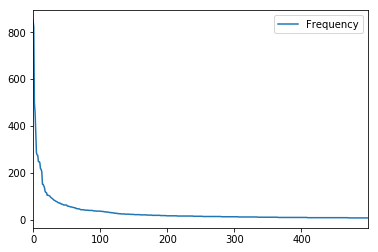

In [46]:
dist0.plot()

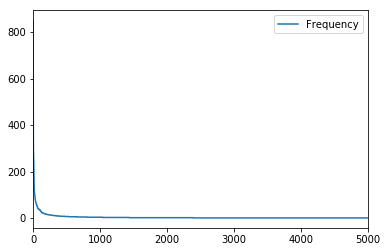

In [47]:
dist.plot()

In [48]:
bg = list(nltk.bigrams(megaTweet))

bgFreq = nltk.FreqDist(bg)
bgFreq.most_common(5)

[((u'aurat', u'march'), 192),
 ((u'aurat', u':/'), 98),
 ((u':/', u'march'), 76),
 ((u'on', u'aurat'), 62),
 ((u'this', u'of'), 50)]

In [49]:
tg = list(nltk.ngrams(megaTweet, 3))

tgFreq = nltk.FreqDist(tg)
tgFreq.most_common(5)

[((u'aurat', u':/', u'march'), 62),
 ((u'qaumon', u'aurat', u'march'), 35),
 ((u'daur', u'qaumon', u'aurat'), 35),
 ((u'hawwa', u'sanwara', u"internationalwomen's"), 32),
 ((u'aurat', u':/', u'from'), 27)]

<h2>Statistical Techniques<h2>

<h3>Co occurance Matrix</h3>

In [50]:
sparseMatrix = defaultdict(lambda: defaultdict(lambda: 0))

for tweet in df['tokens']:
    for word1 in tweet:
        for word2 in tweet:
            sparseMatrix[word1][word2]+=1

In [51]:
print(sparseMatrix['march']['this'])

144


In [52]:
lexicon_size=len(sparseMatrix)
def mod_hash(x, m):
    return hash(x) % m
dense_matrix = np.zeros((lexicon_size, lexicon_size))

for k in sparseMatrix.keys():
    for k2 in sparseMatrix[k].keys():
        dense_matrix[mod_hash(k, lexicon_size)][mod_hash(k2, lexicon_size)] = \
            sparseMatrix[k][k2]

print(dense_matrix)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


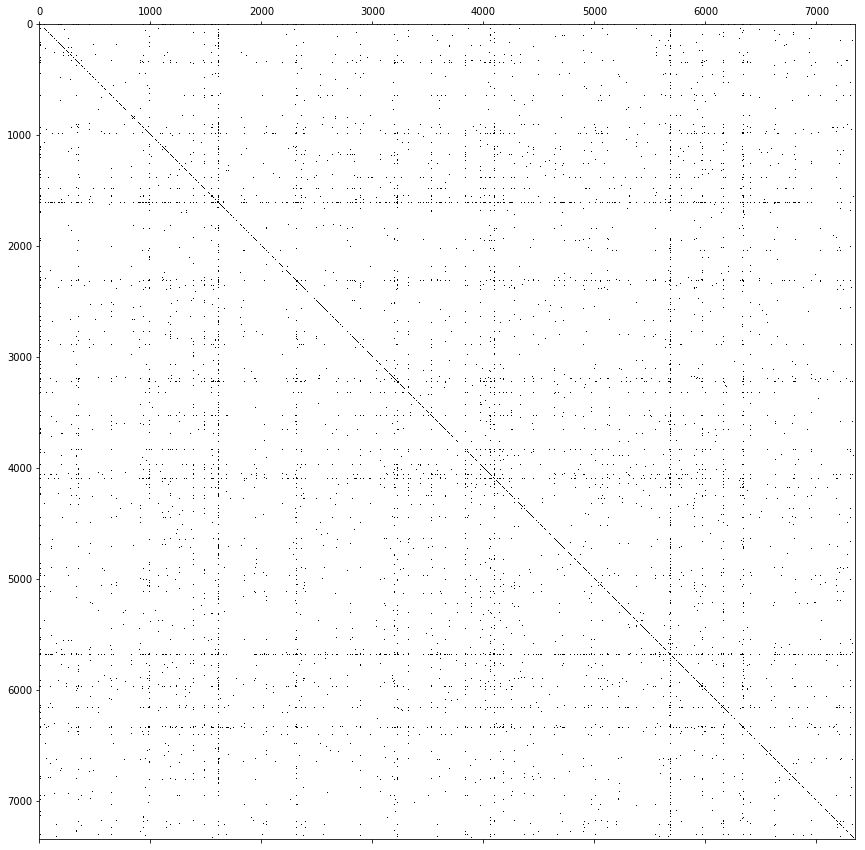

In [53]:
fig = plt.figure(figsize=(15, 15), frameon=False)
ax1 = fig.add_subplot(111)
ax1.spy(dense_matrix)
plt.show()

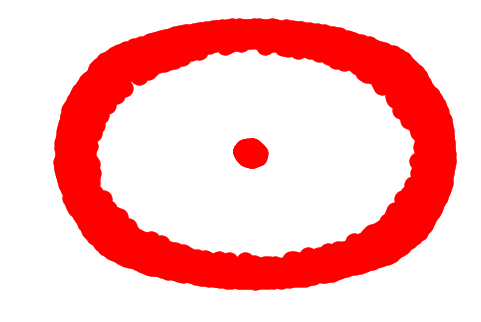

In [54]:
netG = nx.from_numpy_matrix(dense_matrix)
nx.draw(netG)

In [55]:
dense_matrix[dense_matrix == 0] = np.nan

In [56]:
cmap = Colormap(851)
fig2 = plt.figure(figsize=(15, 15), frameon=False)
ax2 = fig2.add_subplot(111)
#ax2.matshow(dense_matrix, cmap=cmap)pac
ax2.imshow(dense_matrix, interpolation = 'none', cmap=cmap)

Error in callback <function post_execute at 0x7f2ce1a8c1b8> (for post_execute):


NotImplementedError: Abstract class only

<Figure size 1080x1080 with 1 Axes>

<h3>Building Vector Space<h3>

In [57]:
vectorIndex = {}
offset=0
for word in vocab:
    vectorIndex[word] = offset
    offset += 1
#vectorIndex

<h3>Vector Space Exploration</h3>

In [58]:
def count (series, term):
    c = 0
    for x in range(0, len(series)):
        if term in series.iloc[x]:
            c += 1
    return c
#count(df['tokens'], "this")

In [59]:
#tf = frequency of term y in document x / frequency of all terms in document x
l = len(df['tokens'])
tfIdf = {}
s = 0
for t in df['tokens']:
    l2 = {}
    for w in t:
        # freq of w int t / len if t
        tf = t.count(w) / len(t)
        idf = math.log(l / count(df['tokens'], w))
        l2.update({w : tf*idf})
    tfIdf.update({s : l2})
    s += 1

In [60]:
#tfIdf
l = []
for x in tfIdf.values():
    for y in x.values():
        l.append(y)
#l

(array([    0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0., 30808.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0., 

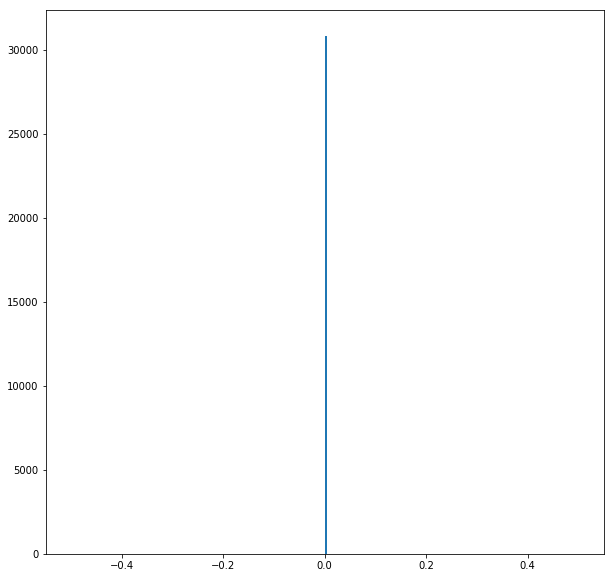

In [61]:
fig3 = plt.figure(figsize=(10, 10), frameon=False)
ax3 = fig3.add_subplot(111)
#ax3.title("Histogram of TF-IDF Scores")
ax3.hist(l, bins=200)  # arguments are passed to np.histogram
#.show()

<h3>tf-idf - sklearn</h3>

In [62]:
from sklearn.feature_extraction.text import CountVectorizer

count_vectorizer = CountVectorizer()
count_vectorizer.fit_transform(df['text'].tolist())
print ("Vocabulary:", count_vectorizer.vocabulary)

freq_term_matrix = count_vectorizer.transform(df['text'].tolist())
print (freq_term_matrix.todense())


('Vocabulary:', None)
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [63]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf = TfidfTransformer(norm="l2")
tfidf.fit(freq_term_matrix)

print ("IDF:", tfidf.idf_)

# IDF: [ 0.69314718 -0.40546511 -0.40546511  0.        ]

('IDF:', array([6.1402005 , 7.52649486, 7.52649486, ..., 7.52649486, 7.52649486,
       7.52649486]))


In [64]:
tfidf

TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True)

In [65]:
tf_idf_matrix = tfidf.transform(freq_term_matrix)
print (tf_idf_matrix.todense())

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


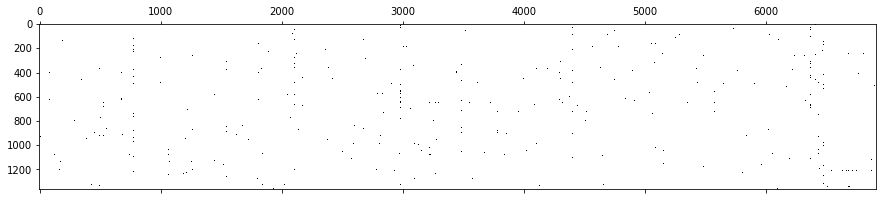

In [66]:
fig4 = plt.figure(figsize=(15, 15), frameon=False)
ax4 = fig4.add_subplot(111)
ax4.spy(tf_idf_matrix.todense())
plt.show()

<h3>PCA</h3>

In [67]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

labels_color_map = {
    0: '#20b2aa', 1: '#ff7373', 2: '#ffe4e1', 3: '#005073', 4: '#4d0404',
    5: '#ccc0ba', 6: '#4700f9', 7: '#f6f900', 8: '#00f91d', 9: '#da8c49'
}
pca_num_components = 2
tsne_num_components = 2

clustering_model = KMeans(
    n_clusters=1,
    max_iter=300,
    precompute_distances="auto",
    n_jobs=-1
)

labels = clustering_model.fit_predict(tf_idf_matrix)
X = tf_idf_matrix.todense()
X.shape

(1365, 6914)

In [68]:
reduced_data = PCA(n_components=pca_num_components).fit_transform(X)
print(reduced_data)

[[-0.00188375  0.01259102]
 [-0.02718802 -0.03139942]
 [-0.06309522  0.09142599]
 ...
 [-0.03625678 -0.04869847]
 [-0.03230434 -0.1523388 ]
 [ 0.00762551  0.03712146]]


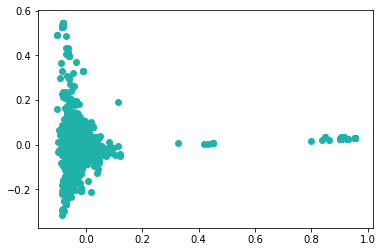

In [69]:
fig5, ax5 = plt.subplots()
for index, instance in enumerate(reduced_data):
    # print instance, index, labels[index]
    pca_comp_1, pca_comp_2 = reduced_data[index]
    color = labels_color_map[labels[index]]
    ax5.scatter(pca_comp_1, pca_comp_2, c=color)
plt.show()

<h3>SVD</h3>

In [70]:
from sklearn.decomposition import TruncatedSVD

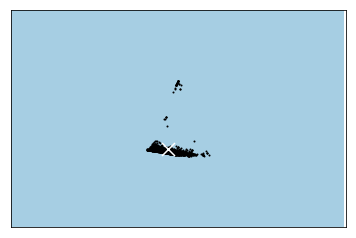

In [71]:
reduced_data = TruncatedSVD(n_components=2).fit_transform(X)

kmeans = KMeans(n_clusters=1, init='k-means++', max_iter=100, n_init=1, verbose=False)
kmeans.fit(reduced_data)

h = .02     # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

</h3>Spectral Clustering on Data</h3>

In [72]:
from sklearn.cluster import SpectralClustering

In [73]:
lexicon_size=len(sparseMatrix)
def mod_hash(x, m):
    return hash(x) % m
dm = np.zeros((lexicon_size, lexicon_size))

for k in sparseMatrix.keys():
    for k2 in sparseMatrix[k].keys():
        dm[mod_hash(k, lexicon_size)][mod_hash(k2, lexicon_size)] = \
            sparseMatrix[k][k2]

print(dm)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [74]:
sc = SpectralClustering(2, affinity='precomputed', n_init=100)
specMat = sc.fit_predict(dm)

/home/hunaid/.local/lib/python2.7/site-packages/sklearn/utils/validation.py:892: UserWarning: Array is not symmetric, and will be converted to symmetric by average with its transpose.
  warnings.warn("Array is not symmetric, and will be converted "
/home/hunaid/.local/lib/python2.7/site-packages/sklearn/manifold/spectral_embedding_.py:237: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


In [75]:
#type(sc.affinity_matrix_)
(len(sc.labels_), len(sc.labels_[sc.labels_ == 1]), len(sc.labels_[sc.labels_ == 0]))

(7346, 267, 7079)

In [76]:
(sc.labels_.shape, sc.affinity_matrix_.shape)

((7346,), (7346, 7346))

In [77]:
sc.affinity_matrix_[:, 1]

array([0., 1., 0., ..., 0., 0., 0.])

In [78]:
nx_graph = nx.from_numpy_matrix(sc.affinity_matrix_)

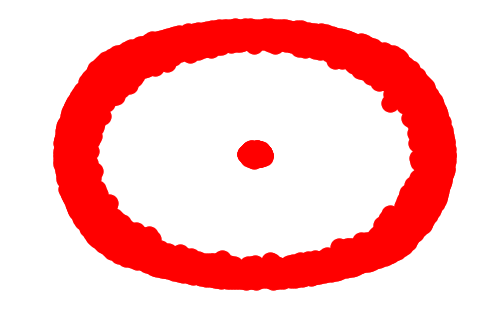

In [79]:
nx.draw(nx_graph)

In [80]:
len(sc.labels_[sc.labels_ == 1])

267

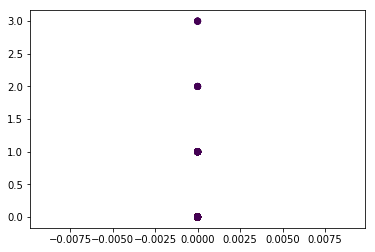

In [81]:
plt.scatter(sc.affinity_matrix_[:, 0], sc.affinity_matrix_[:, 1], c=sc.labels_)
plt.show()

<h3>Classification</h3>

In [82]:
from sklearn.model_selection import train_test_split

In [83]:
X_train, X_test, y_train, y_test = train_test_split(sc.affinity_matrix_, sc.labels_, test_size=0.33, random_state=42)

In [84]:
(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

((4921, 7346), (2425, 7346), (4921,), (2425,))

In [85]:
from sklearn.neural_network import MLPClassifier

In [86]:
nn = MLPClassifier()

In [87]:
nn.fit(X_train, y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [88]:
nn.score(X_test, y_test)

0.9987628865979381